In [1]:
import os
import utils.cop as cop
from utils.data_loader import load_data, convert_signal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

from scipy.signal import butter, sosfilt,  filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y


def butter_lowpass_filter(signal, cutoff=4, fs=20, order=3):
    """Return a low-pass filtered signal."""
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalize the cutoff
    b, a = butter(order, normal_cutoff, btype='low',
                  analog=False)  # Filter coefficients
    y = filtfilt(b, a, signal)  # Filter the signal
    return y

In [2]:
regressions = [[0.33,0.59,0.40,0.34,0.52,0.62,0.43,0.44,0.63,0.67,0.49,0.63,1.48,0.41], 
               [0.41,0.41,0.38,0.33,0.62,0.55,0.58,0.47,0.72,0.66,0.48,0.74,0.58,1.02]]


root = './data/2023-06-15 mci002/'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))

raw_data = load_data(file_list[:2], filter=False)
pressure_data = load_data(file_list[:2], filter=False, regressions=regressions)
filt_data = load_data(file_list[:2], filter=True, regressions=regressions)


raw = convert_signal(raw_data[0], 'pressure')
pressure = convert_signal(pressure_data[0], 'pressure')
filter = convert_signal(filt_data[0], 'pressure')

time = [x * 0.05 for x in range(len(pressure))]
x = raw
y = pressure



--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataLeft_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataRight_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataLeft_60PUIKDwA5.txt
21 columns found
Converting to pressure:
Left
left insole
--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataRight_60PUIKDwA5.txt
21 columns found
Converting to pressure:
Right
right insole
--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataLeft_60PUIKDwA5.txt
21 columns found
Filtering data
Converting to pressure:
Left
left insole
--------------
reading data file ./data/2023-06-15 mci002/S10_20230616_rawDataRight_60PUIKDwA5.txt
21 columns found
Filtering data
Converting to pressure:
Right
right insole


--------------
reading data file ./data/2023-06-29 flexosensemci004/S1_20230628_rawDataLeft_MDAY0S5DIR.txt
21 columns found
Converting to pressure:
Left
left insole
--------------
reading data file ./data/2023-06-29 flexosensemci004/S1_20230628_rawDataRight_MDAY0S5DIR.txt
21 columns found
Converting to pressure:
Right
right insole


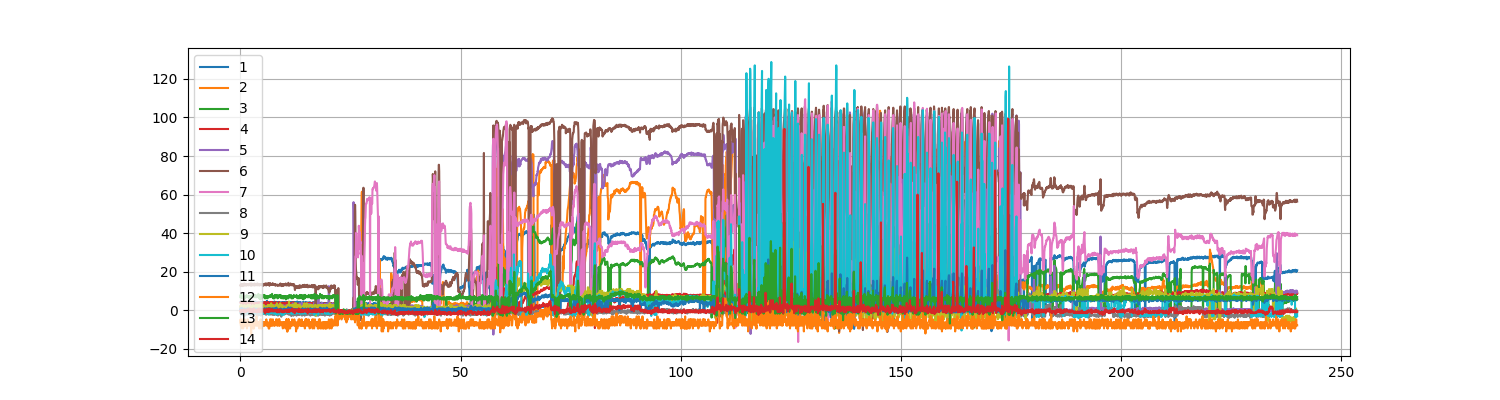

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


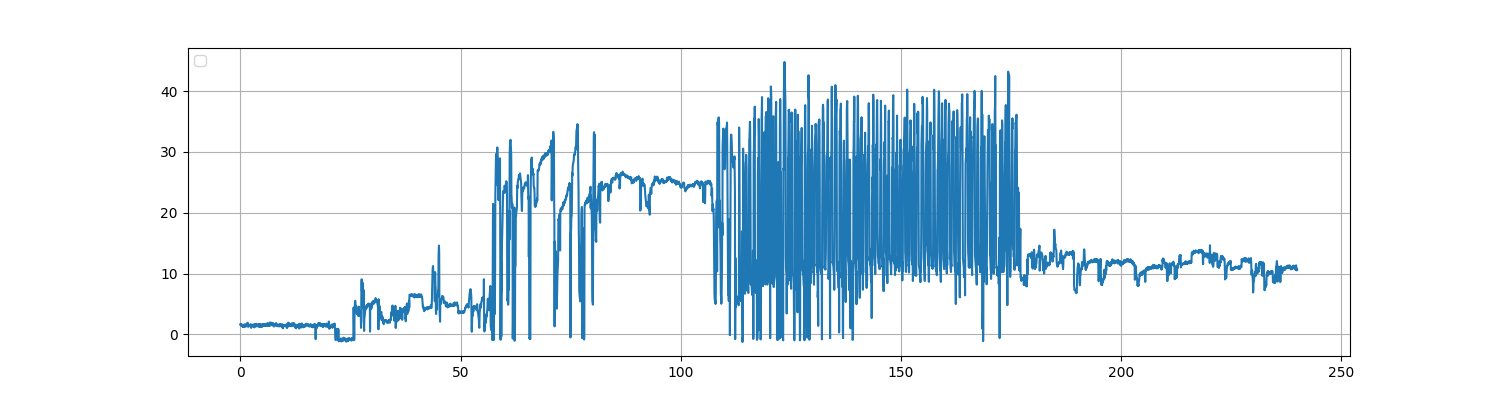

In [6]:
regressions = [[0.27,0.30,0.25,0.27,0.33,0.34,0.41,0.55,0.92,0.58,0.48,1.56,0.57,0.48],
               [0.29,0.48,0.34,0.49,0.35,0.46,0.44,0.43,0.70,0.41,0.39,0.34,0.40,0.75]]

root = './data/2023-06-29 flexosensemci004/'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))

raw_data = load_data(file_list[:2], filter=False, regressions=regressions)

raw = convert_signal(raw_data[0], 'pressure')

time = [x * 0.05 for x in range(len(raw))]
x = raw

d = raw_data[0][['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,4))
for col in d.columns:
    plt.plot(time, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

plt.figure(figsize=(15,4))
plt.plot(time, x)
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

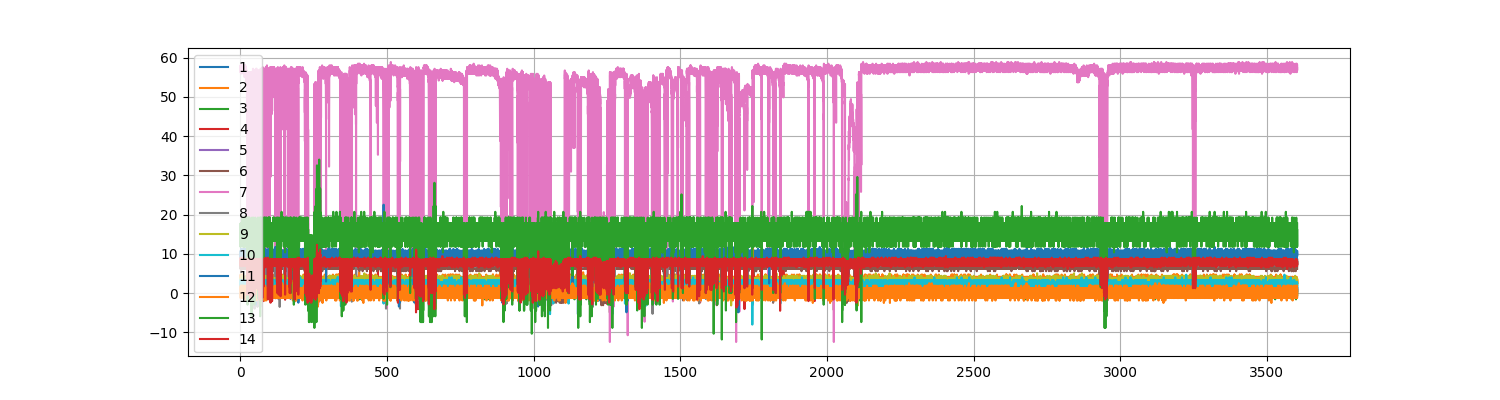

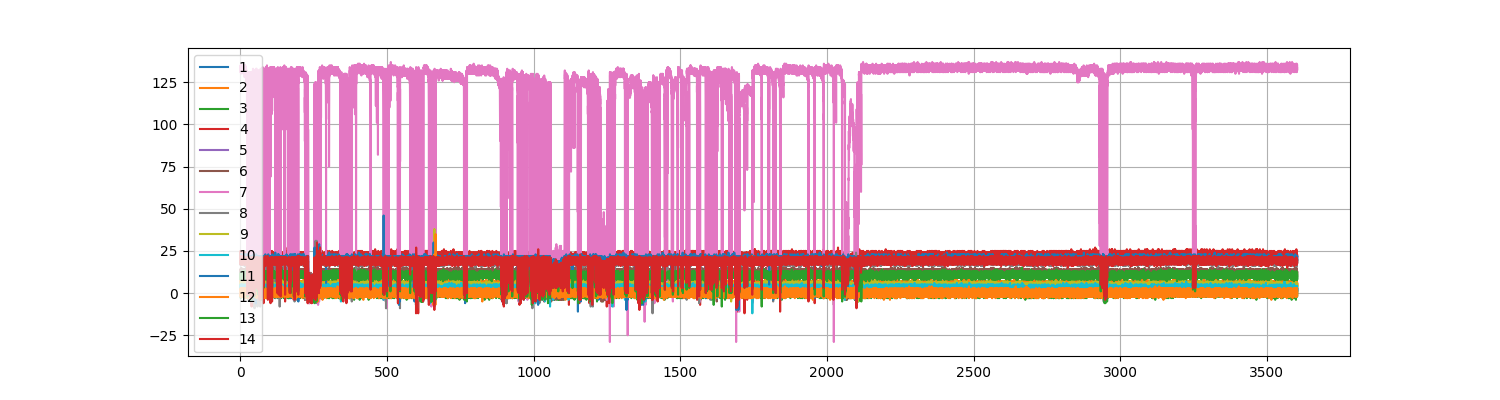

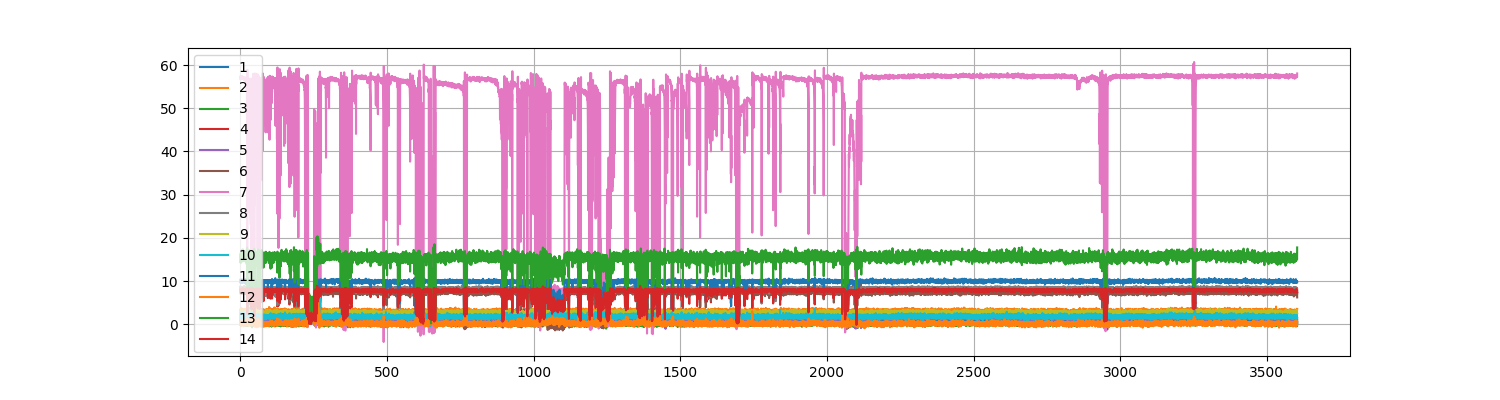

In [6]:
d = pressure_data[0][['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,4))
for col in d.columns:
    plt.plot(time, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

d = raw_data[0][['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,4))
for col in d.columns:
    plt.plot(time, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

d = filt_data[0][['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,4))
for col in d.columns:
    plt.plot(time, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()